# Session 2 - Multi-Armed Bandits - Assignment

In this assignment you will apply different multi-armed bandit algorithms in order to discover the bandit with highest reward.
We'll start with deterministic bandits, meaning that the bandit rewards are not subject to any underlying stochastic process.
Next we'll focuss on stochastic bandits where the reward of a bandit is the result of a stochastic process and therefore making the discovery of the best bandit much harder. 
Finally we will applay the MAB strategies to solve practical real-life problems.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Deterministic bandits
Assume you have to play 5 bandits with fixed rewards. These rewards are hidden and unknown when you start playing. 
You can play the bandits 100 times. Find out how you can maximize your total reward over these 100 trials.

Use the BanditEnv_1 environment for this experiment.

In [2]:
##### Deterministic Bandit Environment

class BanditEnv_1:
    def __init__(self):
        self.rewards = [-10,6,8,0,-2]
        
    def reset(self):
        self.rewards = [-10,6,8,0,-2]
        
    def step(self,action):
        self.action = action
        return self.rewards[self.action]

In [3]:
# Create an Env1 object
Env1 = BanditEnv_1()
Env1.reset()

In [4]:
# Taken an action. For example choose bandit 0
reward = Env1.step(0)
print('reward =', reward)

reward = -10


If you know in advance that the bandits have fixed rewards, the best strategy will be to play them all once and then pick the one with the highest reward (greedy action).

[-10, 6, 8, 0, -2]
Bandit with the highest reward is bandit 2 with a reward of 8
The total reward =  710


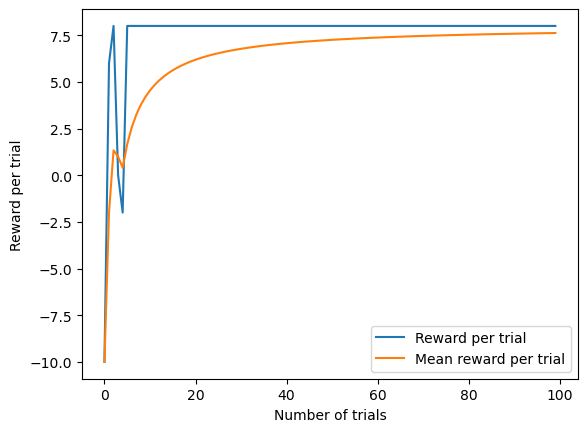

In [5]:
rewards = []
meanRewards = []
totalReward = 0
for action in range(5):
    rewards.append(Env1.step(action))
    meanRewards.append(np.mean(rewards))
    totalReward = totalReward + reward
    
print(rewards)
bestAction = np.argmax(rewards)
print('Bandit with the highest reward is bandit',bestAction, 'with a reward of',rewards[bestAction])

for i in range(100 - 5):
    rewards.append(Env1.step(bestAction))
    meanRewards.append(np.mean(rewards))
    totalReward = totalReward + Env1.step(bestAction)

print('The total reward = ', totalReward)

# Plot the rewards as a funtion of the number of trials
plt.plot(rewards)
plt.plot(meanRewards)
plt.xlabel('Number of trials')
plt.ylabel('Reward per trial')
plt.legend(['Reward per trial','Mean reward per trial'])

##### 2. Stochastic bandits

In the case of stochastic bandits, the reward is sampled from an initially unknown distribution. Our task is to discover the expected reward of each of the bandits as quickly (and reliably) as possible. 
As an example, assume that the reward of a bandit comes from a normal distribution with mean = 10 and standard deviation of 5. This means that in 68% procent of the trials this bandit will return a reward between 10-5 = 5 and 10+5 = 15. If you play this bandit multiple times, you can expect that the average reward will converge to 10.

Use BanditEnv_2 for this exercise. All 5 bandits have rewards coming from normal distributions with different means, but with the same standard deviation (std = 1).
You can play this bandit 200 times. Try to come up with a good strategy to maximize the total reward over these 200 trials.

In [6]:
class BanditEnv_2:
    def __init__(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1
        
    def reset(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1

    def step(self,action):
        self.action = action
        return np.random.normal(self.means[self.action], self.std, 1)[0]

In [7]:
# Create an Env2 object
Env2 = BanditEnv_2()
Env2.reset()
print(Env2.means)

[-10, 6, 8, 0, -2]


### 2.1 Epsilon Greedy

1. Implement the epsilon greedy algorithm to play the Env2 bandits. 
2. Show the influence of epsilon parameter. Do this by plotting the reward history for different values of epsilon. Also visualize how often a bandit was chosen.
3. Find the optimal epsilon value giving you maximum total reward.
4. Use epsilon decay. This means that you gradually decrease the value of epsilon as the number of trials increases. Use the following rule: $\epsilon(t+1) = \eta \times \epsilon(t) $ where $0< \eta < 1$
5. Now test for different values of the standard deviation. What if the standard deviation becomes larger?

epsilon =  0.0 total reward =  702.4578704038955
epsilon =  0.1 total reward =  702.0957949684876
epsilon =  0.2 total reward =  615.275544172438
epsilon =  0.3 total reward =  505.6371232602769
epsilon =  0.4 total reward =  444.8450498554236
epsilon =  0.5 total reward =  440.77164949423167
epsilon =  0.6 total reward =  238.35035245113664
epsilon =  0.7 total reward =  253.9691311990525
epsilon =  0.8 total reward =  160.04696432663732
epsilon =  0.9 total reward =  136.1131260805476
epsilon =  1.0 total reward =  109.81143948628272


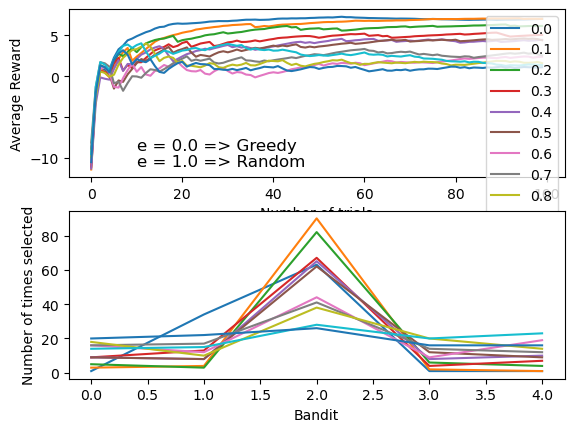

<Figure size 2000x1000 with 0 Axes>

In [8]:
# epsilon greedy
iterations = 100
epsilon = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Banditcount = len(Env2.means)


for e in epsilon:
    Bandits = np.zeros(Banditcount)
    means = np.zeros(Banditcount)
    rewards = []
    meanRewards = []
    totalReward = 0

    # Play the first 5 actions to set the initial estimated means
    for action in range(Banditcount):
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        means[action] = reward
        Bandits[action] = Bandits[action] + 1
        totalReward = totalReward + reward

    for _ in range(iterations-Banditcount):
        if np.random.random() < e:
            action = np.random.randint(Banditcount)
        else:
            action = np.argmax(means)
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = reward
        totalReward = totalReward + reward
    print('epsilon = ', e, 'total reward = ', totalReward)
    
    ax1 = plt.subplot(2,1,1)
    plt.plot(meanRewards)
    ax2 = plt.subplot(2,1,2)
    plt.plot(Bandits)
plt.figure(figsize=(20,10))
ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(epsilon)
ax1.text(10, -9, 'e = 0.0 => Greedy', fontsize=12)
ax1.text(10, -11, 'e = 1.0 => Random', fontsize=12)
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Number of times selected')

plt.show()


In [ ]:
# Epsilon decay

### 2.2 Optimistic Initial Value

Continue to work with the Env2 environment. 
Implement the Optimistic Initial Value algorithm. Start by initializing the estimated bandit means to a high non-zero value and use a greedy approach. 
After each play the estimated bandit mean will come closer to the true bandit mean.

1. Implement the optimistic initial value algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Show the initialization. What happens if you initialize the estimated means to larger values? 
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the optimistic initial value approach to the epsilon greedy approach. Plot the reward history of both in one graph.



In [31]:
class BanditEnv_2:
    def __init__(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1
        
    def reset(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1

    def step(self,action,stdev=None):
        self.action = action
        if stdev is None:
            return np.random.normal(self.means[self.action], self.std, 1)[0]
        return np.random.normal(self.means[self.action], stdev, 1)[0]

In [32]:
# Create an Env2 object
Env2 = BanditEnv_2()
Env2.reset()
print(Env2.means)

[-10, 6, 8, 0, -2]


True means =  [-10, 6, 8, 0, -2]
Optimistic Initail Values =  [5.079441885934601, 7.416633102017083, 7.664739152154514, 6.376092417360242, 7.233633599174702]
---------------------------------------------------------------
Standard deviation =  0.1
total reward =  7602.270373424812
Bandits =  [  7.  45. 929.  13.  11.]
Estimated means =  [5.7434258212619085, 8.089712298215355, 8.092262151362329, 7.719941765161201, 7.268959790325119]
Errors =  [15.74342582  2.0897123   0.09226215  7.71994177  9.26895979]
Total Absolute Error =  34.91430182632591
Mean Absolute Error =  6.982860365265182
Mean Squared Error =  79.54839656712136
Root Mean Squared Error =  8.918990781872205
---------------------------------------------------------------
Standard deviation =  0.5
total reward =  7628.4060962596095
Bandits =  [  6.  47. 929.  12.  11.]
Estimated means =  [7.898195504204695, 8.07623522210607, 8.097909036412286, 8.095527244750329, 7.393640548307319]
Errors =  [17.8981955   2.07623522  0.09790904 

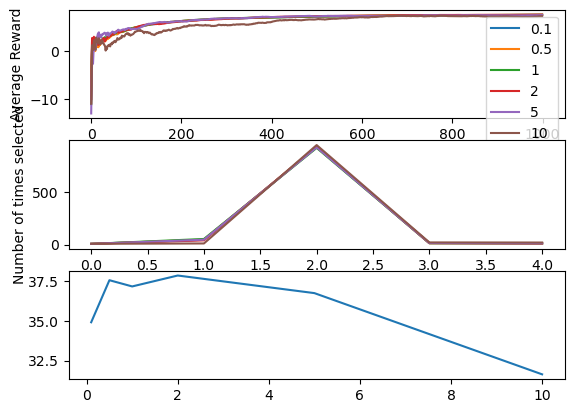

In [46]:
# Optimistic initial value
# Hidden means are [-10,6,8,0,-2]
iterations = 1000
OptimisticInitialValue = 100
stdevs = [0.1, 0.5, 1, 2, 5, 10]
Banditcount = len(Env2.means)
total_errors = []

print('True means = ', Env2.means)
print('Optimistic Initail Values = ', means)
print('---------------------------------------------------------------')
for stdev in stdevs:
    Bandits = np.ones(Banditcount)
    means = [OptimisticInitialValue for i in range(Banditcount)]
    rewards = []
    meanRewards = []
    totalReward = 0
    print('Standard deviation = ', stdev)

    for _ in range(iterations):
        action = np.argmax(means)
        reward = Env2.step(action,stdev)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = means[action] + ((reward - means[action]) / Bandits[action])
        totalReward = totalReward + reward
    print('total reward = ', totalReward)
    print('Bandits = ', Bandits)
    print('Estimated means = ', means)
    error = np.abs(np.array(Env2.means) - np.array(means))
    total_error = np.sum(error)
    total_errors.append(total_error)
    print('Errors = ', error)
    print('Total Absolute Error = ', total_error)
    print('Mean Absolute Error = ', total_error / len(error))
    print('Mean Squared Error = ', np.sum(error**2) / len(error))
    print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
    print('---------------------------------------------------------------')

    ax1 = plt.subplot(3,1,1)
    plt.plot(meanRewards)
    ax2 = plt.subplot(3,1,2)
    plt.plot(Bandits)
ax3 = plt.subplot(3,1,3)
plt.plot(stdevs,total_errors)
ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(stdevs)
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Number of times selected')

plt.show()




### 2.3 Upper Confidence Bound

Continue to work with the Env2 environment and implement the Upper Confidence Bound algorithm. 
Select the action based on the following rule:

$A_t = argmax_a \left( MeanRewards + c  \sqrt{\frac{\ln{t}}{N_a(t)}}  \right)$

1. Implement the upper confidence bound algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Change the parameter c? Explain the influence of c. 
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the upper confidence bound approach to the epsilon greedy approach and opimistic initial value. Plot the reward histories of the algorithms in one graph.


In [3]:
# Upper Confidence Bound



### EXTRA: non-stationary bandits

In the following you have to deal with non-stationary bandits. This means that the expected reward is not stationary and will change over time. 
in the BanditEnv_3, the initial expected rewards will change with a constant after each action.

Figure out the best strategy to optimize the total reward after 200 actions.

In [43]:
class BanditEnv_3:
    def __init__(self):
        self.means = np.array([[-10,6,8,0,-2]])
        self.std = 1
    def reset(self):
        self.means = np.array([[-10,6,8,0,-2]])
        
    def step(self,action):
        self.action = action
        self.means = self.means + np.array([[0.15,-0.1,-0.15,0.05,0.1]])
        return np.random.normal(self.means[0,self.action], self.std, 1)[0]

In [45]:
# create an env3 environment
env3 = BanditEnv_3()
env3.reset()

# solve the environment (for 200 steps)


## 3. Server latencies

You have to make 1000 webpage requests. There are 25 servers with different latencies to choose from. 
Your task is to come up with a clever strategy to reduce the cumulative latency of these 1000 webpage requests.
The file 'latencies.csv' contains these 1000 different request. 
It's important to know that in a practical situation you would not have access to this data and requests will be made sequentially.
Use a multi-armed bandit to find the best strategy to minimize the total latency over these 1000 requests. Again, it's not allowed to process and statistically analyse the data in advance.

1. Try and optimize different types of bandits: epsilon-greedy, optimistic initial value, upper confidence bound. 
2. Compare these bandits in terms of total cumulated reward (or regret). Make a graph to visualize this.
3. Make graphs showing how often each bandit was chosen.


EXTRA: program a bayesian badit to solve the latency problem.

In [6]:
dataset = pd.read_csv('latencies.csv')
dataset.tail()

,Server_1,Server_2,Server_3,Server_4,Server_5,Server_6,Server_7,Server_8,Server_9,Server_10,...,Server_16,Server_17,Server_18,Server_19,Server_20,Server_21,Server_22,Server_23,Server_24,Server_25
995,265,1080,136,25,395,1350,105,113,85,471,...,414,129,410,176,589,92,56,1298,234,2603
996,473,6306,84,121,392,33,103,97,876,883,...,451,129,412,245,1113,132,62,11429,305,2264
997,269,1064,83,25,399,33,104,99,615,639,...,417,132,561,143,652,101,56,953,232,2293
998,270,1071,84,24,393,33,120,118,298,755,...,415,129,327,871,670,109,60,954,232,2251
999,296,1065,84,25,395,34,104,111,83,751,...,413,130,305,122,763,102,74,1640,352,2530


In [7]:
# Server latencies

